#### We start with some map plotting

In [1020]:
import folium
import geopandas
import fiona
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import pandas as pd
import numpy as np
from pyproj import Proj, transform

%matplotlib inline

In [1021]:
iris_zone = geopandas.GeoDataFrame.from_file('data/iris_talence.js')
#iris_zone['centroid'] = iris_zone.geometry.centroid

In [1022]:
iris_zone #lat-lon

,DCOMIRIS,DEPCOM,IRIS,NOM_COM,NOM_IRIS,TYP_IRIS,geometry
0,335220112,33522,0112,Talence,Thouars 2,H,POLYGON ((-0.587543196053298 44.78908756888363...
1,335220102,33522,0102,Talence,La Fauvette,H,POLYGON ((-0.587032337621043 44.81515751477936...
2,335220108,33522,0108,Talence,Peylanne-Leysotte,H,POLYGON ((-0.5828804443461369 44.8048544065047...
3,335220103,33522,0103,Talence,Combattants-Bijou,H,POLYGON ((-0.590734733544139 44.78731246999818...
4,335220105,33522,0105,Talence,Cauderes,H,POLYGON ((-0.587032337621043 44.81515751477936...
5,335220113,33522,0113,Talence,Thouars 1,H,POLYGON ((-0.590734733544139 44.78731246999818...
6,335220110,33522,0110,Talence,Megret,H,POLYGON ((-0.589329054641736 44.80295051298793...
7,335220109,33522,0109,Talence,Plume-La-Boule,H,POLYGON ((-0.591909983144453 44.79381924440587...
8,335220107,33522,0107,Talence,Saint-Genes,H,POLYGON ((-0.585092624083788 44.81789608008269...
9,335220111,33522,0111,Talence,Lycee,H,POLYGON ((-0.589329054641736 44.80295051298793...


In [1023]:
def reverse_coord(df):
    new_df = df.copy()
    new_df.drop('geometry', axis=1, inplace=True)
    new_geometry = []
    for pol in df.geometry:
        lat, lon = pol.exterior.coords.xy
        new_pol = Polygon([(x,y) for x,y in zip(lon,lat)])
        new_geometry.append(new_pol)
    new_df['geometry'] = new_geometry
    return new_df

In [1024]:
new_iris_zone = reverse_coord(iris_zone) #lon-lat
new_iris_zone

,DCOMIRIS,DEPCOM,IRIS,NOM_COM,NOM_IRIS,TYP_IRIS,geometry
0,335220112,33522,0112,Talence,Thouars 2,H,POLYGON ((44.78908756888363 -0.587543196053298...
1,335220102,33522,0102,Talence,La Fauvette,H,POLYGON ((44.81515751477936 -0.587032337621043...
2,335220108,33522,0108,Talence,Peylanne-Leysotte,H,POLYGON ((44.80485440650479 -0.582880444346136...
3,335220103,33522,0103,Talence,Combattants-Bijou,H,POLYGON ((44.78731246999818 -0.590734733544139...
4,335220105,33522,0105,Talence,Cauderes,H,POLYGON ((44.81515751477936 -0.587032337621043...
5,335220113,33522,0113,Talence,Thouars 1,H,POLYGON ((44.78731246999818 -0.590734733544139...
6,335220110,33522,0110,Talence,Megret,H,POLYGON ((44.80295051298793 -0.589329054641736...
7,335220109,33522,0109,Talence,Plume-La-Boule,H,POLYGON ((44.79381924440587 -0.591909983144453...
8,335220107,33522,0107,Talence,Saint-Genes,H,POLYGON ((44.81789608008269 -0.585092624083788...
9,335220111,33522,0111,Talence,Lycee,H,POLYGON ((44.80295051298793 -0.589329054641736...


In [1025]:
iris_centroid = pd.DataFrame()
iris_centroid['IRIS'] = new_iris_zone.IRIS
iris_centroid['NOM_IRIS'] = new_iris_zone.NOM_IRIS
iris_centroid['centroid'] = new_iris_zone.geometry.centroid
iris_centroid

,IRIS,NOM_IRIS,centroid
0,0112,Thouars 2,POINT (44.79354224595853 -0.5848378519031359)
1,0102,La Fauvette,POINT (44.81019141508219 -0.5818717980131292)
2,0108,Peylanne-Leysotte,POINT (44.80424036466194 -0.5779499329224149)
3,0103,Combattants-Bijou,POINT (44.79742045661789 -0.5992888795417041)
4,0105,Cauderes,POINT (44.81514417677343 -0.5801863670719747)
5,0113,Thouars 1,POINT (44.79150077627097 -0.5887326627452812)
6,0110,Megret,POINT (44.79927485755307 -0.5919257460871858)
7,0109,Plume-La-Boule,POINT (44.79972205684665 -0.5856002761892566)
8,0107,Saint-Genes,POINT (44.81940028009768 -0.5838082234652153)
9,0111,Lycee,POINT (44.80352365819188 -0.5950218072979759)


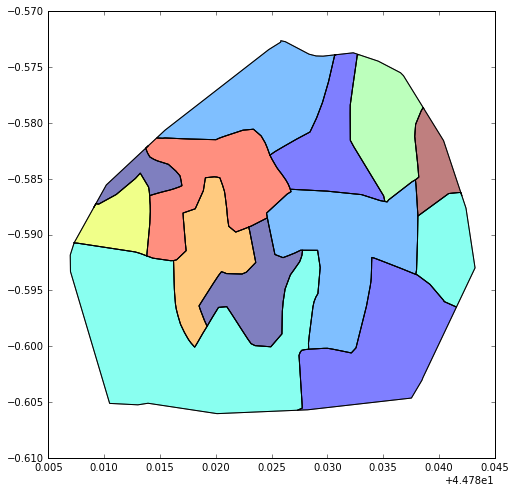

In [1026]:
plt.figure(figsize=(8,8))
new_iris_zone.plot()

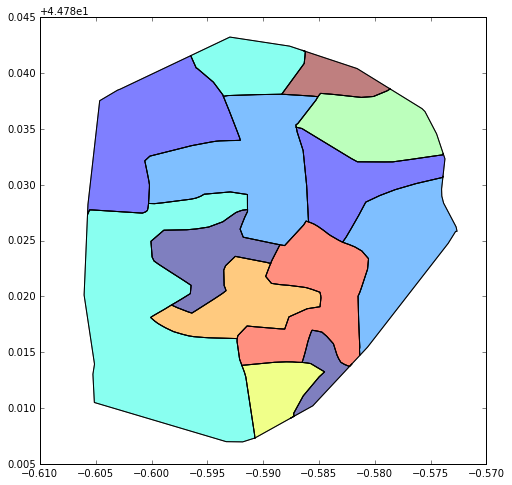

In [1027]:
plt.figure(figsize=(8,8))
iris_zone.plot()

In [1028]:
talence_map = folium.Map(location=[44.80477, -0.59543], zoom_start=14)
talence_map

In [1029]:
iris = new_iris_zone.to_json()

In [1030]:
folium.GeoJson(data=iris_zone,style_function = lambda x: {'fillColor': 'green', 'color': 'green','fillOpacity':0.25}).add_to(talence_map)

In [1031]:
talence_map

In [1032]:
for index,zone in iris_centroid.iterrows():
    #talence_map.simple_marker(
     #   location = zone['centroid'])
    folium.Marker([zone['centroid'].x, zone['centroid'].y],popup = zone['NOM_IRIS']).add_to(talence_map) 
#folium.Marker([44.79354224595853,-0.5848378519031359], popup="coucou").add_to(talence_map)

In [1033]:
talence_map

In [1034]:
import ast
def txt_to_df(file):
    txt = [line.rstrip('\n') for line in open(file)]
    txt = ''.join(txt)
    lst = ast.literal_eval(txt)
    
    df = geopandas.GeoDataFrame(columns = ['geometry'])
    df.crs= {'init': 'epsg:4326', 'no_defs': True}
    
    for poly in lst:
        geom = Polygon(poly)
        df.loc[len(df)] = geom
        
    return df

In [1035]:
bureau_vote = txt_to_df('data/bdv.txt')
reversed_bureau_vote = reverse_coord(bureau_vote)

In [1036]:
bureau_vote.head()

,geometry
0,"POLYGON ((44.807702 -0.588413, 44.807446 -0.58..."
1,"POLYGON ((44.802496 -0.5840919999999999, 44.80..."
2,"POLYGON ((44.808468 -0.584997, 44.806715 -0.57..."
3,"POLYGON ((44.80826 -0.60165, 44.803464 -0.5946..."
4,"POLYGON ((44.82018 -0.590767, 44.818651 -0.587..."


In [1037]:
reversed_bureau_vote.head()

,geometry
0,"POLYGON ((-0.588413 44.807702, -0.586268 44.80..."
1,"POLYGON ((-0.5840919999999999 44.802496, -0.58..."
2,"POLYGON ((-0.584997 44.808468, -0.578787000000..."
3,"POLYGON ((-0.60165 44.80826, -0.594673 44.8034..."
4,"POLYGON ((-0.590767 44.82018, -0.587901 44.818..."


In [1038]:
folium.GeoJson(data=reversed_bureau_vote, style_function = lambda x: {'fillColor': 'red','color':'red', 'weight':0.07,'fillOpacity':0.3}).add_to(talence_map)
#type(bureau_vote)

In [1039]:
talence_map

In [1041]:
talence_map.save('map/talence.html')